# 1. 합성곱 신경망 이해

## 1.1 합성곱 연산

### 합성곱 연산

합성곱 구현

In [2]:
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

flip() 함수를 이용한 배열 뒤집기

In [3]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [4]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


### 파이썬에서의 곱 ( list, array)

In [5]:
a = [1,2,3,4]
b = [2,2,2,2]
c = a*b
print(type(a))
print(c)

TypeError: can't multiply sequence by non-int of type 'list'

In [6]:
a = np.array([1,2,3,4])
b = np.array([2,2,2,2])
c = a*b
print(type(a))
print(c)
print( np.sum(c) )

<class 'numpy.ndarray'>
[2 4 6 8]
20


넘파이의 점 곱으로 합성곱 연산

In [7]:
N = len(x)
F = len(w_r)
NUM = N - F + 1
for i in range(NUM):
    print(np.sum(x[i:i+4]*w_r), end=" ")

63 48 49 28 21 20 

In [8]:
print(x[1:5].shape)
print(x[1:5])
print(w_r.shape)

(4,)
[8 3 7 1]
(4,)


In [9]:
print( type((4)) )
print( type((4,)) )

<class 'int'>
<class 'tuple'>


In [10]:
a = np.array([1,2,3,4])
b = np.array([2,2,2])
c = a*b
# print(type(a))
# print(c)
# print( np.sum(c) )

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [11]:
a = np.array([1,2,3,4])
b = np.array([2,2,2])
c = np.dot(a,b)

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

In [12]:
a = np.array([1,2,3,4])
b = np.array([2,2,2,2])
c = np.dot(a,b)
print(c)
print(c.shape)

20
()


In [13]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r), end=" ")

63 48 49 28 21 20 

In [14]:
print(w_r.shape)
print(w_r.T.shape)

(4,)
(4,)


In [15]:
a = np.array([1,2,3,4,5,6])
print(a)
print(a.reshape(-1,1))

[1 2 3 4 5 6]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [16]:
c = np.dot(x[0:4], w_r.reshape(-1,1))
print(c)

[63]


In [17]:
a = np.array([[1,2,3,4]])
b = np.array([2,2,2,2])
b = b.reshape(-1,1)
print(a.shape)
print(b.shape)
c = np.dot(a,b)  # (1,4)(4,1) => (1,1)
print(c)
print(c.shape)

(1, 4)
(4, 1)
[[20]]
(1, 1)


In [18]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)), end = " ")  # (4,)(4,1) => (1,)

[63] [48] [49] [28] [21] [20] 

싸이파이로 합성곱 수행

In [19]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

싸이파이로 교차상관 수행

In [20]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

풀 패딩

In [21]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

세임 패딩

In [22]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

2차원 배열에서 합성곱 수행 ( mode='valid' )

In [23]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[1, 1], 
              [1, 1]])
print(x.shape)
print(w.shape)
from scipy.signal import correlate2d
out = correlate2d(x, w, mode='valid')
print(out)
print(out.shape)

(3, 3)
(2, 2)
[[12 16]
 [24 28]]
(2, 2)


2차원 배열에서 합성곱 수행 ( mode='same' )

In [24]:
correlate2d(x, w, mode='same')

array([[12, 16,  9],
       [24, 28, 15],
       [15, 17,  9]])

### 케라스의 Conv2D를 이용한 합성곱 연산

이미지 초기화(4차원 배열)

In [25]:
!pip install tensorflow

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image)
print(image.numpy())
print(image.shape)

tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


이미지 시각화

In [27]:
print(image.numpy().reshape(3,3)) # (1,3,3,1) => (3,3)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


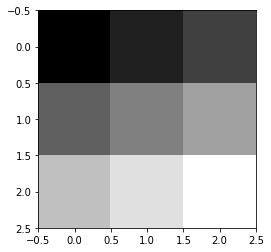

In [28]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')  #(1,3,3,1) => (3,3)
plt.show()

In [29]:
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print(weight.shape)
print(weight)
print(weight.reshape(2,2))

(2, 2, 1, 1)
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[1. 1.]
 [1. 1.]]


Conv2D를 이용한 합성곱(벨리드 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


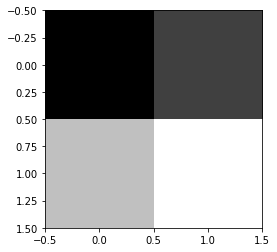

In [30]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

Conv2D를 이용한 합성곱(세임 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


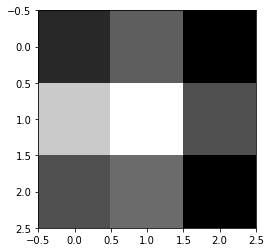

In [31]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

필터가 3개인 경우 합성곱 연산

In [32]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
# print(weight)
temp = np.transpose(weight,(3,0,1,2))
for data in temp:
    print(data.reshape(2,2))

weight.shape (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


conv2d.shape (1, 2, 2, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]]]]
[[12. 16.]
 [24. 28.]]
[[120. 160.]
 [240. 280.]]
[[-12. -16.]
 [-24. -28.]]


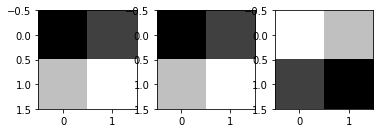

In [33]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy())
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(2,2))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(2,2), cmap='gray')
plt.show()

#### 축교환 예제

In [34]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.swapaxes(a, 0, 3)
print(b)

[[[[ 0  8]
   [ 2 10]]

  [[ 4 12]
   [ 6 14]]]


 [[[ 1  9]
   [ 3 11]]

  [[ 5 13]
   [ 7 15]]]]


In [35]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (3,0,1,2))
print(b)

[[[[ 0  2]
   [ 4  6]]

  [[ 8 10]
   [12 14]]]


 [[[ 1  3]
   [ 5  7]]

  [[ 9 11]
   [13 15]]]]


In [36]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (2,3,0,1))
print(b)

[[[[ 0  4]
   [ 8 12]]

  [[ 1  5]
   [ 9 13]]]


 [[[ 2  6]
   [10 14]]

  [[ 3  7]
   [11 15]]]]


In [37]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (3,2,1,0))
print(b)

[[[[ 0  8]
   [ 4 12]]

  [[ 2 10]
   [ 6 14]]]


 [[[ 1  9]
   [ 5 13]]

  [[ 3 11]
   [ 7 15]]]]


이미지의 채널이 3개인 경우( weight도 채널이 3개임)

In [38]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt

image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)

maps = np.swapaxes(image, 0, 3)
for i, map in enumerate(maps):
    print(map.reshape(5,5))

[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [39]:
weight = np.array( [ 
                     [[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
                     [[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
                     [[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
                   ] )

maps = np.transpose(weight,(2,0,1,3))
for i, map in enumerate(maps):
    print(map.reshape(3,3))

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [40]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,3,3,1)
print(conv2d.numpy().reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


transpose를 이용한 시각화

In [41]:
# (3,3,3,2) => (3,2,3,3)
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

maps = np.transpose(weight, (2,3,0,1) )

for map in maps:
    for filter in map:
       print(filter)

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


합성곱 연산( 필터 2개, 채널 3개, 벨리드 패딩 )

In [42]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,3,3,2)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


### 풀링 연산

strides=1, padding='valid' 인 경우

In [43]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


strides=1, padding='same' 인 경우

In [44]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [45]:
temp = np.arange(16).reshape(1,4,4,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy().reshape(4,4))
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool.numpy().reshape(2,2))

(1, 4, 4, 1)
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
(1, 2, 2, 1)
[[ 5.  7.]
 [13. 15.]]


In [46]:
temp = np.arange(9).reshape(1,3,3,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy())
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool)

(1, 3, 3, 1)
[[[[0.]
   [1.]
   [2.]]

  [[3.]
   [4.]
   [5.]]

  [[6.]
   [7.]
   [8.]]]]
(1, 1, 1, 1)
tf.Tensor([[[[4.]]]], shape=(1, 1, 1, 1), dtype=float32)


In [47]:
temp = np.arange(36).reshape(1,6,6,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy())
pool = tf.keras.layers.MaxPool2D(pool_size=(3,3))(image)
print(pool.shape)
print(pool)

(1, 6, 6, 1)
[[[[ 0.]
   [ 1.]
   [ 2.]
   [ 3.]
   [ 4.]
   [ 5.]]

  [[ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]]

  [[12.]
   [13.]
   [14.]
   [15.]
   [16.]
   [17.]]

  [[18.]
   [19.]
   [20.]
   [21.]
   [22.]
   [23.]]

  [[24.]
   [25.]
   [26.]
   [27.]
   [28.]
   [29.]]

  [[30.]
   [31.]
   [32.]
   [33.]
   [34.]
   [35.]]]]
(1, 2, 2, 1)
tf.Tensor(
[[[[14.]
   [17.]]

  [[32.]
   [35.]]]], shape=(1, 2, 2, 1), dtype=float32)


Loading MNIST Data

(60000, 28, 28)
(28, 28)
<class 'numpy.ndarray'>


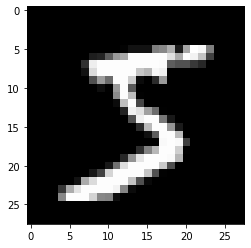

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

print( train_images.shape)  # (60000,28,28)
img = train_images[0]         
print(img.shape)            # (28,28)
print(type(img))
plt.imshow( img, cmap='gray')
plt.show()

합성곱 연산 시각화

conv2d.shape (1, 26, 26, 5)


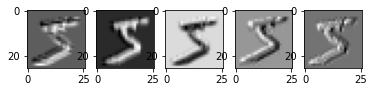

In [49]:
img = img.reshape(-1,28,28,1)   # (1,28,28,1)
img = tf.convert_to_tensor(img)

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)    
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='valid', 
                              kernel_initializer=weight_init)(img)  # (3,3,1,5)
print("conv2d.shape", conv2d.shape)  # (1,26,26,5)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(26,26), cmap='gray')
plt.show()

맥스 풀링 연산 시각화

(1, 13, 13, 5)


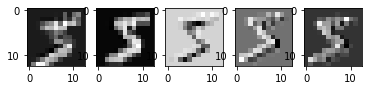

In [50]:
pool = keras.layers.MaxPool2D(pool_size=(2,2))(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(13,13), cmap='gray')
plt.show()

### 활성화 함수

시그모이드 함수

(200,)


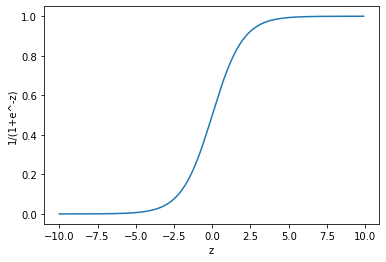

In [51]:
import numpy as np
zs = np.arange(-10., 10., 0.1)
print(zs.shape)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

시그모이드 미분 그래프

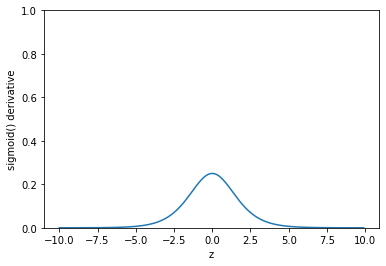

In [52]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

하이퍼 볼릭 탄젠트

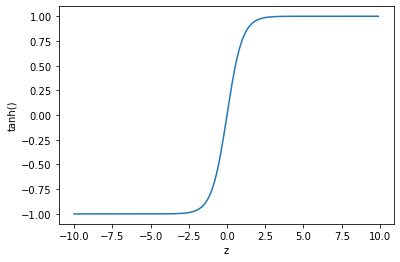

In [54]:
zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

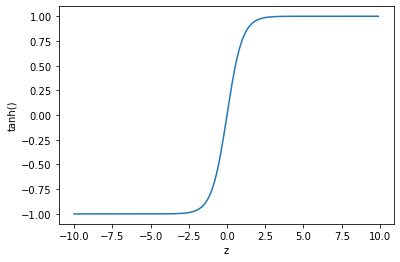

In [55]:
zs = np.arange(-10., 10., 0.1)
gs = [ 2*sigmoid(2*z)-1 for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

하이퍼 볼릭 탄젠트 미분

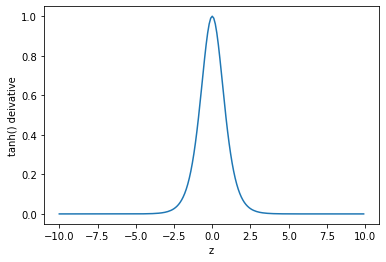

In [56]:
zs = np.arange(-10., 10., 0.1)
gs = [ 1-np.tanh(z)**2 for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

렐루 함수

In [57]:
import numpy as np
def relu(x):
    return np.maximum(x, 0)

In [58]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

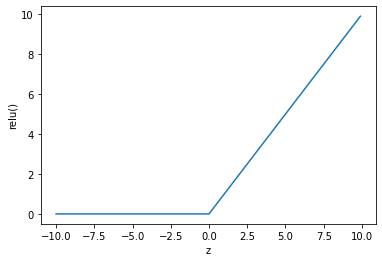

In [59]:
zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [60]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

## 1.2 합성곱 신경망 구현

In [67]:
def foo():
    a = np.arange(1000)
    print("foo()")
    return 10
    print("after")

a = None    
n = foo()
print(n)

foo()
10


In [72]:
def foo():
    print("foo()")
    yield 10
    
c = foo() 
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x000002B3A9C76970>
foo()
10


StopIteration: 

In [75]:
def foo():
    a = np.arange(1000)
    print("foo()")
    yield 10
    print("after")

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x000002B3A9C76BA0>
foo()
10
after


StopIteration: 

In [80]:
def foo():
    a = np.arange(3)  # [0,1,2]
    print("foo()")
    for i in range(3):
        yield a[i:i+1]

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x000002B3ABCAD200>
foo()
[0]
[1]
[2]


StopIteration: 

In [81]:
def foo():
    a = np.arange(3)  # [0,1,2]
    print("foo()")
    for i in range(3):
        yield a[i:i+1]

for n in foo():
    print(n)

foo()
[0]
[1]
[2]


In [82]:
def foo():
    batch_size=10
    x = np.arange(100)
    bins = len(x) // batch_size                  

    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x[start:end] 

for n in foo():
    print(n)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [101]:
x = np.array([10,11,12,13,14,15,16,17,18,19])
indexes = np.random.permutation(len(x))
print(indexes)
print( x[indexes])  # x[[3 7 4 6 9 1 5 0 8 2]]

[8 9 1 6 5 4 2 7 0 3]
[18 19 11 16 15 14 12 17 10 13]


In [106]:
x = np.array([1,2,3,4,5])
print(x[0:10])

[1 2 3 4 5]


In [108]:
def foo(batch_size=10):
    
    x = np.arange(100,205)
    bins = len(x) // batch_size    
    if (len(x) % batch_size) != 0 :
        bins += 1
    indexes = np.random.permutation(len(x))
    x_temp = x[indexes]
    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x_temp[start:end]   

for n in foo(32):
    print(n)

[194 202 160 143 100 108 106 136 170 164 102 154 176 116 189 134 138 163
 109 198 130 180 131 145 165 156 187 193 175 135 104 123]
[149 178 139 119 158 113 184 129 122 128 133 190 197 107 120 142 201 191
 112 161 150 177 171 196 151 110 167 127 137 199 172 166]
[101 115 155 147 103 132 144 153 183 188 146 204 195 141 162 111 168 182
 140 117 148 186 185 105 200 192 179 203 121 173 169 159]
[157 114 174 152 124 125 181 118 126]


In [142]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)   # (128,28,28,1)
#         print('self.conv_w.shape',self.conv_w.shape)  # (3,3,1,10)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)  # (128,28,28,10)
#         print('c_out[0]=',c_out[0])
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)  # (128,28,28,10)
#         print('r_out[0]=',r_out[0])
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)  # (128,14,14,10)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)  # (128,1960)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
#         print('z1.shape',z1.shape)  # (128,1960)(1960,100) + (100,) = (128,100)
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
#         print('z2.shape',z2.shape)  # (128,100)(100,10) + (10,) = (128,10)
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
#                 break
            
#             break
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size        # 미니배치 횟수   
        indexes = np.random.permutation(len(x)) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)
        
#         print("loss=", loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

자동 미분의 사용 방법

In [115]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

print(y)
# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([ 8. 17. 38.], shape=(3,), dtype=float64)
tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


fashion mnist 로드

In [116]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train_all.shape)

(60000, 28, 28)


훈련 데이터 검증 데이터 분리

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(x_train.shape)

(48000, 28, 28)


y_train 형상

In [118]:
print(y_train[0])
print(y_train.shape)

6
(48000,)


결과값 원-핫 인코딩 

In [119]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [120]:
print(y_train_encoded[0])
print(y_train_encoded.shape)
print(x_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(48000, 10)
(48000, 28, 28)


그림 4차원 형상으로 변환

In [121]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [122]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


입력 데이터 표준화 전처리하기

In [123]:
x_train = x_train / 255
x_val = x_val / 255

모델 훈련하기

In [141]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .z2.shape (128, 10)
z2.shape (128, 10)


훈련, 검증 손실 그래프 그리고 검증 세트의 정확도 확인

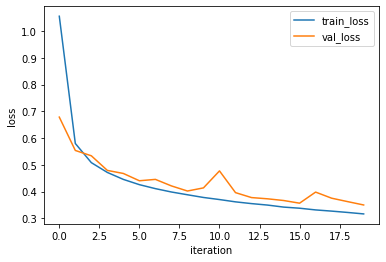

In [125]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

정확도

In [126]:
cn.score(x_val, y_val_encoded)

0.8826666666666667

### 1.3 케라스로 합성곱 신경망 구현

필요한 클래스들을 임포트하기

In [143]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

합성곱층 쌓기

In [144]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))) # w:(3,3,1,10),b:(10,)

풀링층 쌓기

In [145]:
conv1.add(MaxPooling2D((2, 2)))

완전 연결층에 주입할 수 있도록 특성 맵 펼치기

In [146]:
conv1.add(Flatten())

완전 연결층 쌓기

In [147]:
conv1.add(Dense(100, activation='relu'))    # (128,1960)(1960,100)+(100,)
conv1.add(Dense(10, activation='softmax'))  # (128,100)(100,10)+(10,)

모델 구조 살펴보기

In [148]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

모델 컴파일

In [149]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [150]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4418 - accuracy: 0.8434 - val_loss: 0.3237 - val_accuracy: 0.8859
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3040 - accuracy: 0.8901 - val_loss: 0.2806 - val_accuracy: 0.9002
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2586 - accuracy: 0.9064 - val_loss: 0.2622 - val_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2285 - accuracy: 0.9153 - val_loss: 0.2457 - val_accuracy: 0.9133
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2030 - accuracy: 0.9246 - val_loss: 0.2448 - val_accuracy: 0.9144
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1835 - accuracy: 0.9320 - val_loss: 0.2482 - val_accuracy: 0.9146
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1648 - accuracy: 0.9384 - val_loss: 0.2581 - val_accuracy:

손실 그래프와 정확도 그래프

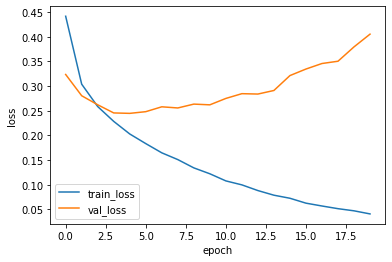

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

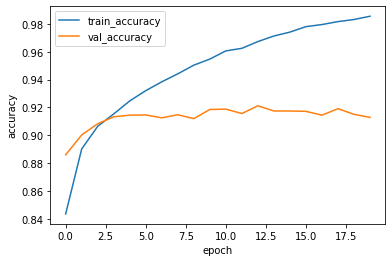

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### 드롭아웃 적용해 합성곱 신경망 구현

케라스로 만든 합성곱 신경망에 드롭아웃 적용하기

In [153]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

드롭아웃층 확인하기

In [154]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

훈련하기

In [155]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5028 - accuracy: 0.8186 - val_loss: 0.3512 - val_accuracy: 0.8753
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3692 - accuracy: 0.8665 - val_loss: 0.3014 - val_accuracy: 0.8939
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3306 - accuracy: 0.8787 - val_loss: 0.2770 - val_accuracy: 0.8995
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3069 - accuracy: 0.8860 - val_loss: 0.2657 - val_accuracy: 0.9033
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2826 - accuracy: 0.8953 - val_loss: 0.2538 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2664 - accuracy: 0.8997 - val_loss: 0.2527 - val_accuracy: 0.9088
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2575 - accuracy: 0.9031 - val_loss: 0.2460 - val_accuracy:

손실 그래프와 정확도 그래프 그리기

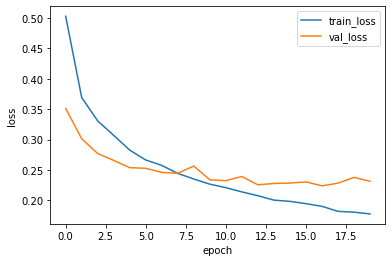

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

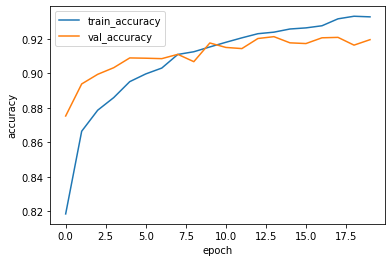

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [160]:
a = np.array([1,2,3,4])
print(a)
b = tf.constant(a)
print(b)
print(b.numpy())

[1 2 3 4]
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
[1 2 3 4]


In [161]:
a = np.array([1,2,3,4])
print(a)
b = tf.convert_to_tensor(a)
print(b)

[1 2 3 4]
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
